**Лабораторна робота №4. Аналіз головних компонент (алгоритм PCA)**

Приблизний строк виконання - 10 годин

**Рекомендована дата здачі: 21 грудня 2021 року**

Виконала студентка групи [КМ-11мн] [Коваленко Олександра Петрівна]

Студент здав роботу: (заповнюється викладачем відповідно до дати повідомлення з роботою у Slack)

Студент захистив роботу на оцінку: (заповнюється викладачем)

**Зауваження: для застосування методу РСА можна використовувати бібліотеки для
мови Python (наприклад, scikit-learn або аналогічні).**

**Також для проведення кластеризації і крос-валідації також можна використовувати бібліотеки.**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Part 1
**Частина 1. Основи аналізу головних компонент**

Використовуються набори даних та вхідні/вихідні змінні з:

*   лабораторної роботи №1, частини №1 і №2;
*   лабораторної роботи №2, частини №1 і №2;
*   лабораторної роботи №3, частини №1.

Для вище зазначених наборів даних потрібно виконати наступне завдання.

1.Застосувавши метод аналізу головних компонент (РСА), визначити:

1.   два параметри з найбільшим внеском в дисперсію
2.   скільки параметрів треба взяти, щоб їх сумарний внесок в
дисперсію був 60%, 80%, 98%
3.   яку мінімальну кількість параметрів треба взяти, щоб їх
сумарний внесок в дисперсію був не менше 90%.

Результати мають бути аргументовані чисельно та графічно.


###Lab 1, part 1

In [ ]:
file_url11 = "https://raw.githubusercontent.com/IvanSergeyevichZhuk/ML_KPI/main/Data/Lab1/Part1/MN/MN09-Kovalenko.csv"
df11 = pd.read_csv(file_url11, sep=';', decimal=',',header=None)
df11

,0,1,2,3,4,5,6,7
0,0.63,0.5,0.175,1.1105,0.467,0.268,0.329,10
1,0.63,0.455,0.15,1.1315,0.481,0.2745,0.305,9
2,0.63,0.48,0.15,1.271,0.6605,0.2425,0.31,11
3,0.63,0.49,0.225,1.336,0.6805,0.259,0.3245,10
4,0.635,0.505,0.145,1.1345,0.505,0.2655,0.315,10
...,...,...,...,...,...,...,...,...
245,0.69,0.55,0.2,1.569,0.687,0.3675,0.46,12
246,0.7,0.565,0.175,1.8565,0.8445,0.3935,0.54,10
247,0.7,0.535,0.175,1.773,0.6805,0.48,0.512,15
248,0.705,0.545,0.17,1.58,0.6435,0.4565,0.265,11


In [ ]:
X_df11 = df11.drop(columns=7)
Y_df11 = df11[7]
st11 = pd.DataFrame(data = StandardScaler().fit_transform(X_df11))
x_train11 = st11[:-50]
x_test11 = st11[:50]

In [ ]:
pca = PCA()
pca_x_train11 = pca.fit_transform(x_train11)
pca_x_train11 = pca.transform(x_test11)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.29230505e-01, 2.84282761e-02, 2.03459958e-02, 1.03961246e-02,
       8.69158530e-03, 2.23683427e-03, 6.70679000e-04])

In [ ]:
pca = PCA(0.6)
pca_x_train11 = pca.fit_transform(x_train11)
pca_x_test11 = pca.transform(x_test11)
pca.n_components_

1

In [ ]:
pca = PCA(0.8)
pca_x_train11 = pca.fit_transform(x_train11)
pca_x_test11 = pca.transform(x_test11)
pca.n_components_

1

In [ ]:
pca = PCA(0.98)
pca_x_train11 = pca.fit_transform(x_train11)
pca_x_test11 = pca.transform(x_test11)
pca.n_components_

4

In [ ]:
pca = PCA(0.9)
pca_x_train11 = pca.fit_transform(x_train11)
pca_x_test11 = pca.transform(x_test11)
pca.n_components_

1

###Lab 1, part 2

In [ ]:
file_url12 = "https://raw.githubusercontent.com/Alexandra-Kovalenko1/data/main/MN09-Kovalenko_Part2%20(1).csv"
df12 = pd.read_csv(file_url12, sep=';', decimal=',',header=None)
df12

,0,1,2,3,4,5,6,7
0,0.625,0.490,0.165,1.1165,0.4895,0.2615,0.3325,0
1,0.625,0.475,0.160,1.0845,0.5005,0.2355,0.3105,0
2,0.625,0.500,0.170,1.0985,0.4645,0.2200,0.3540,1
3,0.625,0.470,0.155,1.1955,0.6430,0.2055,0.3145,0
4,0.625,0.485,0.175,1.3620,0.6765,0.2615,0.3705,0
...,...,...,...,...,...,...,...,...
295,0.725,0.570,0.205,1.6195,0.7440,0.3150,0.4880,0
296,0.750,0.550,0.195,1.8325,0.8300,0.3660,0.4400,0
297,0.760,0.605,0.215,2.1730,0.8010,0.4915,0.6460,0
298,0.135,0.130,0.040,0.0290,0.0125,0.0065,0.0080,1


In [ ]:
X_df12 = df12.drop(columns=7)
Y_df12 = df12[7]
st12 = pd.DataFrame(data = StandardScaler().fit_transform(X_df12))
x_train12 = st12[:-50]
x_test12 = st12[:50]

In [ ]:
pca = PCA()
pca_x_train12 = pca.fit_transform(x_train12)
pca_x_test12 = pca.transform(x_test12)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.16229112e-01, 3.63309963e-02, 2.39146608e-02, 1.06438793e-02,
       9.88548548e-03, 2.23089845e-03, 7.64967306e-04])

In [ ]:
pca = PCA(0.6)
pca_x_train12 = pca.fit_transform(x_train12)
pca_x_test12 = pca.transform(x_test12)
pca.n_components_

1

In [ ]:
pca = PCA(0.8)
pca_x_train12 = pca.fit_transform(x_train12)
pca_x_test12 = pca.transform(x_test12)
pca.n_components_

1

In [ ]:
pca = PCA(0.98)
pca_x_train12 = pca.fit_transform(x_train12)
pca_x_test12 = pca.transform(x_test12)
pca.n_components_

4

In [ ]:
pca = PCA(0.9)
pca_x_train12 = pca.fit_transform(x_train12)
pca_x_test12 = pca.transform(x_test12)
pca.n_components_

1

###Lab 2, part 1

In [ ]:
file_url21 = "https://raw.githubusercontent.com/IvanSergeyevichZhuk/ML_KPI/main/Data/Lab2/Part1/MN/MN09-Kovalenko.csv"
df21 = pd.read_csv(file_url21, header=None)
df21 = df21.set_axis([0, 1, 2, 3, 4, 5, 6, 7, 8] , axis=1)
df21=pd.get_dummies(data=df21, columns=[0, 1, 2, 3, 4, 5, 6, 7])
df21

,8,0_usual,1_critical,1_improper,2_complete,2_foster,3_1,3_2,3_3,3_more,4_convenient,4_critical,4_less_conv,5_convenient,5_inconv,6_nonprob,6_problematic,6_slightly_prob,7_not_recom,7_priority,7_recommended
0,priority,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1
1,priority,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0
2,not_recom,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0
3,priority,1,0,1,0,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1
4,priority,1,0,1,0,1,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,spec_prior,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
296,not_recom,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0
297,spec_prior,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
298,spec_prior,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0


In [ ]:
X_df21 = df21.drop(columns=8)
Y_df21 = df21[8]
st21 = pd.DataFrame(data = StandardScaler().fit_transform(X_df21))
x_train21 = st21[:-50]
x_test21 = st21[:50]

In [ ]:
pca = PCA()
pca_x_train21 = pca.fit_transform(x_train21)
pca_x_test21 = pca.transform(x_test21)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([2.21373497e-01, 1.11238090e-01, 8.74969918e-02, 8.46628402e-02,
       8.28780074e-02, 8.17709197e-02, 8.12125047e-02, 8.00968946e-02,
       7.82913455e-02, 6.26535291e-02, 2.83253793e-02, 6.11828565e-32,
       2.98966805e-32, 6.67226081e-33, 4.49062447e-33, 4.19876260e-33,
       1.13987109e-33, 2.66348582e-34, 9.73870111e-36, 0.00000000e+00])

In [ ]:
pca = PCA(0.6)
pca_x_train21 = pca.fit_transform(x_train21)
pca_x_test21 = pca.transform(x_test21)
pca.n_components_

6

In [ ]:
pca = PCA(0.8)
pca_x_train21 = pca.fit_transform(x_train21)
pca_x_test21 = pca.transform(x_test21)
pca.n_components_

8

In [ ]:
pca = PCA(0.98)
pca_x_train21 = pca.fit_transform(x_train21)
pca_x_test21 = pca.transform(x_test21)
pca.n_components_

11

In [ ]:
pca = PCA(0.9)
pca_x_train21 = pca.fit_transform(x_train21)
pca_x_test21 = pca.transform(x_test21)
pca.n_components_

9

###Lab 2, part 2

In [ ]:
file_url22 = "https://raw.githubusercontent.com/Alexandra-Kovalenko1/data/main/MN09-Kovalenko_lab2.csv"
df22 = pd.read_csv(file_url22, sep=';', decimal=',', header=None)
df22

,0,1,2,3,4,5,6,7
0,0.395,0.295,0.095,0.2725,0.1150,0.0625,0.0850,8
1,0.395,0.270,0.100,0.2985,0.1445,0.0610,0.0820,5
2,0.400,0.290,0.100,0.2675,0.1205,0.0605,0.0765,5
3,0.405,0.285,0.090,0.2645,0.1265,0.0505,0.0750,6
4,0.410,0.335,0.110,0.3300,0.1570,0.0705,0.1700,7
...,...,...,...,...,...,...,...,...
295,0.365,0.270,0.085,0.2225,0.0935,0.0525,0.0660,7
296,0.370,0.270,0.095,0.2175,0.0970,0.0460,0.0650,6
297,0.375,0.280,0.080,0.2165,0.0935,0.0925,0.0700,7
298,0.380,0.285,0.095,0.2430,0.0895,0.0665,0.0750,7


In [ ]:
X_df22 = df22.drop(columns = 7)
Y_df22 = df22[7]
st22 = pd.DataFrame(data = StandardScaler().fit_transform(X_df22))
x_train22 = st22[:-50]
x_test22 = st22[:50]

In [ ]:
pca = PCA()
pca_x_train22 = pca.fit_transform(x_train22)
pca_x_test22 = pca.transform(x_test22)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.01598073e-01, 4.67604151e-02, 2.49616073e-02, 1.24070606e-02,
       1.09434872e-02, 2.45474473e-03, 8.74612073e-04])

In [ ]:
pca = PCA(0.6)
pca_x_train22 = pca.fit_transform(x_train22)
pca_x_test22 = pca.transform(x_test22)
pca.n_components_

1

In [ ]:
pca = PCA(0.75)
pca_x_train22 = pca.fit_transform(x_train22)
pca_x_test22 = pca.transform(x_test22)
pca.n_components_

1

In [ ]:
pca = PCA(0.8)
pca_x_train22 = pca.fit_transform(x_train22)
pca_x_test22 = pca.transform(x_test22)
pca.n_components_

1

In [ ]:
pca = PCA(0.98)
pca_x_train22 = pca.fit_transform(x_train22)
pca_x_test22 = pca.transform(x_test22)
pca.n_components_

4

In [ ]:
pca = PCA(0.9)
pca_x_train22 = pca.fit_transform(x_train22)
pca_x_test22 = pca.transform(x_test22)
pca.n_components_

1

###Lab 3, part 1

In [ ]:
file_url3 = "https://raw.githubusercontent.com/IvanSergeyevichZhuk/ML_KPI/main/Data/Lab3/Part1/MN/MN09-Kovalenko.csv"
df3 = pd.read_csv(file_url3, sep=';', decimal=',',header=None)
df3

,0,1,2,3,4,5,6,7
0,0.63,0.5,0.175,1.1105,0.467,0.268,0.329,10
1,0.63,0.455,0.15,1.1315,0.481,0.2745,0.305,9
2,0.63,0.48,0.15,1.271,0.6605,0.2425,0.31,11
3,0.63,0.49,0.225,1.336,0.6805,0.259,0.3245,10
4,0.635,0.505,0.145,1.1345,0.505,0.2655,0.315,10
...,...,...,...,...,...,...,...,...
245,0.69,0.55,0.2,1.569,0.687,0.3675,0.46,12
246,0.7,0.565,0.175,1.8565,0.8445,0.3935,0.54,10
247,0.7,0.535,0.175,1.773,0.6805,0.48,0.512,15
248,0.705,0.545,0.17,1.58,0.6435,0.4565,0.265,11


In [ ]:
X_df3 = df3.drop(columns = 7)
Y_df3 = df3[7]
st3 = pd.DataFrame(data = StandardScaler().fit_transform(X_df3))
x_train3 = st3[:-50]
x_test3 = st3[:50]

In [ ]:
pca = PCA()
pca_x_train3 = pca.fit_transform(x_train3)
pca_x_test3 = pca.transform(x_test3)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.29230505e-01, 2.84282761e-02, 2.03459958e-02, 1.03961246e-02,
       8.69158530e-03, 2.23683427e-03, 6.70679000e-04])

In [ ]:
pca = PCA(0.6)
pca_x_train3 = pca.fit_transform(x_train3)
pca_x_test3 = pca.transform(x_test3)
pca.n_components_

1

In [ ]:
pca = PCA(0.8)
pca_x_train3 = pca.fit_transform(x_train3)
pca_x_test3 = pca.transform(x_test3)
pca.n_components_

1

In [ ]:
pca = PCA(0.98)
pca_x_train3 = pca.fit_transform(x_train3)
pca_x_test3 = pca.transform(x_test3)
pca.n_components_

4

In [ ]:
pca = PCA(0.9)
pca_x_train3 = pca.fit_transform(x_train3)
pca_x_test3 = pca.transform(x_test3)
pca.n_components_

1

#Part 2
**Частина 2. Аналіз головних компонент і лінійна регресія.**

1. Використовуючи метод РСА, отримайте новий набір даних на основі набору даних для частини №1 лабораторної роботи  № 1. Новий набір даних повинен мати стільки параметрів, щоб їх сумарний внесок в дисперсію був не менше 75%.

2. Використовуючи метод кросс-валідації і методи з лабораторної роботи №1, створіть і навчіть модель лінійної регресії на новому наборі даних. Для навчання і тестування моделі використайте стільки ж даних, скільки було використано під час крос валідації у лабораторній роботі №1.

3. Порівняйте точність нової моделі з точністю моделі отриманої використанням алгоритму крос-валідації у частині №1 лабораторної роботи №1.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [ ]:
file_url11 = "https://raw.githubusercontent.com/IvanSergeyevichZhuk/ML_KPI/main/Data/Lab1/Part1/MN/MN09-Kovalenko.csv"
df11 = pd.read_csv(file_url11, sep=';', decimal=',',header=None)
df11

,0,1,2,3,4,5,6,7
0,0.63,0.5,0.175,1.1105,0.467,0.268,0.329,10
1,0.63,0.455,0.15,1.1315,0.481,0.2745,0.305,9
2,0.63,0.48,0.15,1.271,0.6605,0.2425,0.31,11
3,0.63,0.49,0.225,1.336,0.6805,0.259,0.3245,10
4,0.635,0.505,0.145,1.1345,0.505,0.2655,0.315,10
...,...,...,...,...,...,...,...,...
245,0.69,0.55,0.2,1.569,0.687,0.3675,0.46,12
246,0.7,0.565,0.175,1.8565,0.8445,0.3935,0.54,10
247,0.7,0.535,0.175,1.773,0.6805,0.48,0.512,15
248,0.705,0.545,0.17,1.58,0.6435,0.4565,0.265,11


###Methods

In [ ]:
def fit_MNK(X_train, Y_train):

  n = len(X_train)  
  y = Y_train
  S_y = sum(y)

  S_x1 = sum(X_train[0])
  S_x2 = sum(X_train[1])
  S_x1x2 = sum([X_train[0][i] * X_train[1][i] for i in range(n)])
  S_x1_2 = sum([X_train[0][i] ** 2 for i in range(n)])
  S_x2_2 = sum([X_train[1][i] ** 2 for i in range(n)])

  S_yx1 = sum([y[i] * X_train[0][i] for i in range(n)])
  S_yx2 = sum([y[i] * X_train[1][i] for i in range(n)])

  A = [[n, S_x1, S_x2],
     [S_x1, S_x1_2, S_x1x2],
     [S_x2, S_x1x2, S_x2_2]]

  B = [S_y, S_yx1, S_yx2]


  x = np.linalg.solve(A, B)
  return x

def predict(x, X_test):
  x02 = np.array(X_test[0])
  x12 = np.array(X_test[1])

  L = x[0] + x[1] * x02 + x[2] *x12 
  return L


In [ ]:
def k_fold(method, KFV_train, KFV_test):

    KFV_x_train = KFV_train.iloc[:,:-1]
    KFV_y_train = KFV_train.iloc[:,-1]
    KFV_x_test = KFV_test.iloc[:,:-1]
    KFV_y_test = KFV_test.iloc[:,-1]

    sc = StandardScaler()

    st_KFV_x_train  = sc.fit_transform(KFV_x_train)
    st_KFV_x_test  = sc.transform(KFV_x_test)

    pca = PCA(n_components=2)
    pca_KFV_x_train = pca.fit_transform(st_KFV_x_train)
    pca_KFV_x_test = pca.transform(st_KFV_x_test)
    pca_KFV_x_train = pd.DataFrame(data = pca_KFV_x_train)
    pca_KFV_x_test = pd.DataFrame(data = pca_KFV_x_test)

    KFV_df = method(pca_KFV_x_train, KFV_y_train)
    KFV_predict = predict(KFV_df, pca_KFV_x_test)
    metric = r2_score(KFV_y_test, KFV_predict)
    print(metric)

In [ ]:
S0=(df11[:50]).reset_index(drop=True)
S1=(df11[50:100]).reset_index(drop=True)
S2=(df11[100:150]).reset_index(drop=True)
S3=(df11[150:200]).reset_index(drop=True)
S4=(df11[-50:]).reset_index(drop=True)

set0=pd.concat([S4,S3,S1,S2], ignore_index=True)
set1=pd.concat([S4,S2,S0,S3], ignore_index=True)
set2=pd.concat([S1,S0,S4,S3], ignore_index=True)
set3=pd.concat([S0,S4,S1,S2], ignore_index=True)
set4=pd.concat([S3,S2,S1,S0], ignore_index=True)

In [ ]:
k_fold(fit_MNK, set0, S0)
k_fold(fit_MNK, set1, S1)
k_fold(fit_MNK, set2, S2)
k_fold(fit_MNK, set3, S3)
k_fold(fit_MNK, set4, S4)

0.7883455917485586
0.14459591964527285
-0.02194302641118351
0.16868455733025056
0.10774600197116091


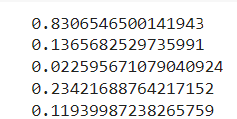

#Part 3
**Частина 3. Аналіз головних компонент і логістична регресія.**

1. Використовуючи метод РСА, отримайте новий набір даних на основі набору даних для частини №2 лабораторної роботи  № 1. Новий набір даних повинен мати стільки параметрів, щоб їх сумарний внесок в дисперсію був не менше 75%.

2. Використовуючи метод кросс-валідації і методи з лабораторної роботи №1, створіть і навчіть модель логістичної регресії на новому наборі даних. Для навчання і тестування моделі використайте стільки ж даних, скільки було використано під час крос валідації у лабораторній роботі №1.

3. Порівняйте результати і точність нової моделі з моделлю, отриманою використанням алгоритму крос-валідації у частині №2 лабораторної роботи №1.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [ ]:
file_url12 = "https://raw.githubusercontent.com/Alexandra-Kovalenko1/data/main/MN09-Kovalenko_Part2%20(1).csv"
df12 = pd.read_csv(file_url12, sep=';', decimal=',',header=None)
df12

,0,1,2,3,4,5,6,7
0,0.625,0.490,0.165,1.1165,0.4895,0.2615,0.3325,0
1,0.625,0.475,0.160,1.0845,0.5005,0.2355,0.3105,0
2,0.625,0.500,0.170,1.0985,0.4645,0.2200,0.3540,1
3,0.625,0.470,0.155,1.1955,0.6430,0.2055,0.3145,0
4,0.625,0.485,0.175,1.3620,0.6765,0.2615,0.3705,0
...,...,...,...,...,...,...,...,...
295,0.725,0.570,0.205,1.6195,0.7440,0.3150,0.4880,0
296,0.750,0.550,0.195,1.8325,0.8300,0.3660,0.4400,0
297,0.760,0.605,0.215,2.1730,0.8010,0.4915,0.6460,0
298,0.135,0.130,0.040,0.0290,0.0125,0.0065,0.0080,1


In [ ]:
S0=(df12[:50]).reset_index(drop=True)
S1=(df12[50:100]).reset_index(drop=True)
S2=(df12[100:150]).reset_index(drop=True)
S3=(df12[150:200]).reset_index(drop=True)
S4=(df12[-50:]).reset_index(drop=True)

set0=pd.concat([S4,S3,S1,S2], ignore_index=True)
set1=pd.concat([S4,S2,S0,S3], ignore_index=True)
set2=pd.concat([S1,S0,S4,S3], ignore_index=True)
set3=pd.concat([S0,S4,S1,S2], ignore_index=True)
set4=pd.concat([S3,S2,S1,S0], ignore_index=True)

###Method

In [ ]:
def fit_MGD_sigmoid(X, Y):

  theeta0 = 0
  theeta1 = 0


  a = 0.0001  
  iter = 10000
  n = float(len(X[0])) 
  result = np.zeros(iter)

  for i in range(iter): 
      predict = theeta0 + theeta1*X[0] 
      d = predict - Y
      
      cost = (1/2 * n) * sum(d * d) 

      result[i] =  cost  
       
      t_1 = (1/n) * sum(d) 
      t_2 = (1/n) * sum(X[0] * (d)) 
    
      theeta0 = theeta0 - a * t_1 
      theeta1 = theeta1 - a * t_2 

      theeta = np.array([theeta0, theeta1]) 

  return theeta

In [ ]:
def predict_sigmoid(x, X_test):
  x02 = np.array(X_test[0])

  predict = x[0] + x[1] * x02 
  return predict

In [ ]:
def classification(predict):
  y_pred = 1/(1+np.exp(-predict))
  return y_pred

In [ ]:
def k_fold(method, KFV_train, KFV_test):

    KFV_x_train = KFV_train.iloc[:,:-1]
    KFV_y_train = KFV_train.iloc[:,-1]
    KFV_x_test = KFV_test.iloc[:,:-1]
    KFV_y_test = KFV_test.iloc[:,-1]

    sc = StandardScaler()

    st_KFV_x_train  = sc.fit_transform(KFV_x_train)
    st_KFV_x_test  = sc.transform(KFV_x_test)

    pca = PCA(n_components=1)

    pca_KFV_x_train = pca.fit_transform(st_KFV_x_train)
    pca_KFV_x_test = pca.transform(st_KFV_x_test)
    pca_KFV_x_train = pd.DataFrame(data = pca_KFV_x_train)
    pca_KFV_x_test = pd.DataFrame(data = pca_KFV_x_test)


    KFV_fit = method(pca_KFV_x_train, KFV_y_train)
    KFV_predict_train = predict_sigmoid(KFV_fit, pca_KFV_x_train)
    classification_train = classification(KFV_predict_train)

    df_pred_train = pd.DataFrame()
    df_pred_train["y_actual"] = KFV_y_train.to_numpy()
    df_pred_train["y_pred_train"] = np.round(classification_train, 3)

    x_positive = df_pred_train[df_pred_train['y_actual'] == 0].max()
    y_negative = df_pred_train[df_pred_train['y_actual'] == 1].min()
    step = (x_positive['y_pred_train'] + y_negative['y_pred_train'])/2
    df_pred_train['class'] = df_pred_train.apply(lambda x: 1 if x['y_pred_train'] <= step 
                                  else (0 if x['y_pred_train'] > step else 1), axis=1)
    

    KFV_predict_test = predict_sigmoid(KFV_fit, pca_KFV_x_test)
    classification_test = classification(KFV_predict_test)

    df_pred_test = pd.DataFrame()
    df_pred_test["y_actual"] = KFV_y_test.to_numpy() 
    df_pred_test["y_pred_test"] = np.round(classification_test, 5)
    df_pred_test['class'] = df_pred_test.apply(lambda x: 1 if x['y_pred_test'] <= step 
                                               else (0 if x['y_pred_test'] > step else 1), axis=1)
    metric = r2_score(KFV_y_test, KFV_predict_test)
    print(metric)

In [ ]:
k_fold(fit_MGD_sigmoid, set0, S0)
k_fold(fit_MGD_sigmoid, set1, S1)
k_fold(fit_MGD_sigmoid, set2, S2)
k_fold(fit_MGD_sigmoid, set3, S3)
k_fold(fit_MGD_sigmoid, set4, S4)

-0.04004491756575779
0.33800694591146274
0.2397602185769402
-0.5883116089382208
0.32147743197216316


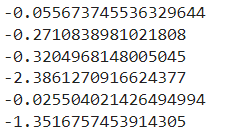

#Part 4
**Частина 4. Аналіз головних компонент і метод k-найближчих сусідів.**

1. Використовуючи метод РСА, отримайте новий набір даних на основі набору даних для частини №2 лабораторної роботи  № 2. Новий набір даних повинен мати стільки параметрів, щоб їх сумарний внесок в дисперсію був не менше 75%.

2. Використовуючи метод кросс-валідації і методи з лабораторної роботи №2, проведіть класифікацію методом k-найближчих сусідів на новому наборі даних. Для навчання і тестування моделі використайте стільки ж даних, скільки було використано під час крос валідації у лабораторній роботі №2.

3. Порівняйте результати і точність нової моделі з моделлю, отриманою використанням алгоритму крос-валідації у частині №2 лабораторної роботи №2.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, matthews_corrcoef

In [ ]:
file_url22 = "https://raw.githubusercontent.com/Alexandra-Kovalenko1/data/main/MN09-Kovalenko_lab2.csv"
df22 = pd.read_csv(file_url22, sep=';', decimal=',', header=None)
df22

,0,1,2,3,4,5,6,7
0,0.395,0.295,0.095,0.2725,0.1150,0.0625,0.0850,8
1,0.395,0.270,0.100,0.2985,0.1445,0.0610,0.0820,5
2,0.400,0.290,0.100,0.2675,0.1205,0.0605,0.0765,5
3,0.405,0.285,0.090,0.2645,0.1265,0.0505,0.0750,6
4,0.410,0.335,0.110,0.3300,0.1570,0.0705,0.1700,7
...,...,...,...,...,...,...,...,...
295,0.365,0.270,0.085,0.2225,0.0935,0.0525,0.0660,7
296,0.370,0.270,0.095,0.2175,0.0970,0.0460,0.0650,6
297,0.375,0.280,0.080,0.2165,0.0935,0.0925,0.0700,7
298,0.380,0.285,0.095,0.2430,0.0895,0.0665,0.0750,7


In [ ]:
train = df22.iloc[:100]
test = df22.iloc[-25:]

x_train = train.iloc[:,:-1].reset_index(drop=True).to_numpy()
x_test = test.iloc[:,:-1].reset_index(drop=True).to_numpy()

y_train = train.iloc[:,-1:].reset_index(drop=True).to_numpy()
y_test = test.iloc[:,-1:].reset_index(drop=True).to_numpy()

In [ ]:
S0=(df22[:50]).reset_index(drop=True)
S1=(df22[50:100]).reset_index(drop=True)
S2=(df22[100:150]).reset_index(drop=True)
S3=(df22[150:200]).reset_index(drop=True)
S4=(df22[200:250]).reset_index(drop=True)
S5=(df22[-50:]).reset_index(drop=True)

set0=pd.concat([S4,S3,S5,S1,S2], ignore_index=True)
set1=pd.concat([S4,S2,S0,S3,S5], ignore_index=True)
set2=pd.concat([S1,S0,S4,S5,S3], ignore_index=True)
set3=pd.concat([S0,S5,S4,S1,S2], ignore_index=True)
set4=pd.concat([S3,S2,S1,S5,S0], ignore_index=True)
set5=pd.concat([S3,S2,S1,S4,S0], ignore_index=True)

In [ ]:
def KNN_eucledian(x_train, y_train , x_test, k):

    pred = []
    for val in x_test: 
        score_length = []
        for j in range(len(x_train)): 
            score_length.append(np.sqrt(np.sum(((np.array(x_train[j,:])) - val)**2))) 
        score_lengtht = np.array(score_length) 
        pred.append(y_train[np.argsort(score_length)[:k]])
        x = []
        for i in range(len(x_test)):
          y = pred 
          x = np.array(y)
          predict = []
        for i in x:
          predict.append(i[0][0])

    return predict

In [ ]:
KFV_train = set0
KFV_test = S0

In [ ]:
KFV_x_train = KFV_train.iloc[:,:-1]
KFV_y_train = KFV_train.iloc[:,-1].reset_index(drop=True).to_numpy()
KFV_x_test = KFV_test.iloc[:,:-1]
KFV_y_test = KFV_test.iloc[:,-1].reset_index(drop=True).to_numpy()

In [ ]:
sc = StandardScaler()

st_KFV_x_train  = sc.fit_transform(KFV_x_train)
st_KFV_x_test  = sc.transform(KFV_x_test)

pca = PCA(n_components=4)
pca_KFV_x_train = pca.fit_transform(st_KFV_x_train)
pca_KFV_x_test = pca.transform(st_KFV_x_test)
pca_KFV_x_train = pd.DataFrame(data = pca_KFV_x_train).to_numpy()
pca_KFV_x_test = pd.DataFrame(data = pca_KFV_x_test).to_numpy()


In [ ]:
KFV_predict = KNN_eucledian(pca_KFV_x_train, np.array(np.split(KFV_y_train, 250)), pca_KFV_x_test, 3)

In [ ]:
def k_fold(method, KFV_train, KFV_test):

    KFV_x_train = KFV_train.iloc[:,:-1]
    KFV_y_train = KFV_train.iloc[:,-1].reset_index(drop=True).to_numpy()
    KFV_x_test = KFV_test.iloc[:,:-1]
    KFV_y_test = KFV_test.iloc[:,-1].reset_index(drop=True).to_numpy()

    sc = StandardScaler()

    st_KFV_x_train  = sc.fit_transform(KFV_x_train)
    st_KFV_x_test  = sc.transform(KFV_x_test)

    pca = PCA(n_components = 1)
    pca_KFV_x_train = pca.fit_transform(st_KFV_x_train)
    pca_KFV_x_test = pca.transform(st_KFV_x_test)
    pca_KFV_x_train = pd.DataFrame(data = pca_KFV_x_train).to_numpy()
    pca_KFV_x_test = pd.DataFrame(data = pca_KFV_x_test).to_numpy()

    KFV_predict = method(pca_KFV_x_train, np.array(np.split(KFV_y_train, 250)), pca_KFV_x_test, 3)
    print('MCC', matthews_corrcoef(KFV_y_test, KFV_predict))

In [ ]:
k_fold(KNN_eucledian, set0, S0)
k_fold(KNN_eucledian, set1, S1)
k_fold(KNN_eucledian, set2, S2)
k_fold(KNN_eucledian, set3, S3)
k_fold(KNN_eucledian, set4, S4)
k_fold(KNN_eucledian, set5, S5)

MCC 0.11363442300185803
MCC 0.12336675255577999
MCC 0.11088060677103681
MCC 0.2722736985822553
MCC -0.04753785180285294
MCC 0.11027083331248096


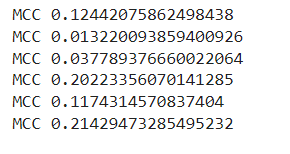

#Part 5
**Частина 5. Аналіз головних компонент і кластеризація.**

1. Використовуючи метод РСА, отримайте новий набір даних на основі набору даних для частини №1 лабораторної роботи  № 3. Новий набір даних повинен мати стільки параметрів, щоб їх сумарний внесок в дисперсію був не менше 75%.

2. Використовуючи методи K-Means і DBSCAN з такими параметрами, як і в частині №1 лабораторної роботи №3, проведіть кластеризацію на новому наборі даних.

3. Порівняйте результати і відповідні характеристики нової кластеризації з кластеризацією, отриманою у частині №1 лабораторної роботи №3.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, matthews_corrcoef

In [ ]:
file_url3 = "https://raw.githubusercontent.com/IvanSergeyevichZhuk/ML_KPI/main/Data/Lab3/Part1/MN/MN09-Kovalenko.csv"
df3 = pd.read_csv(file_url3, sep=';', decimal=',',header=None)
df3

,0,1,2,3,4,5,6,7
0,0.63,0.5,0.175,1.1105,0.467,0.268,0.329,10
1,0.63,0.455,0.15,1.1315,0.481,0.2745,0.305,9
2,0.63,0.48,0.15,1.271,0.6605,0.2425,0.31,11
3,0.63,0.49,0.225,1.336,0.6805,0.259,0.3245,10
4,0.635,0.505,0.145,1.1345,0.505,0.2655,0.315,10
...,...,...,...,...,...,...,...,...
245,0.69,0.55,0.2,1.569,0.687,0.3675,0.46,12
246,0.7,0.565,0.175,1.8565,0.8445,0.3935,0.54,10
247,0.7,0.535,0.175,1.773,0.6805,0.48,0.512,15
248,0.705,0.545,0.17,1.58,0.6435,0.4565,0.265,11


In [ ]:
sc = StandardScaler()
st = sc.fit_transform(df3)
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(st)

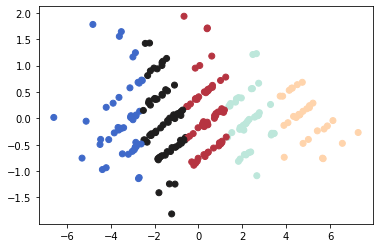

In [ ]:
k_means = KMeans(n_clusters=5)
k_means.fit(pca_fit)
labels2 = k_means.labels_
plt.scatter(pca_fit[:,0],pca_fit[:,1], c=labels2, cmap = 'icefire_r')

In [ ]:
class DBSCAN_handmade:

  def __init__(self, eps, min_samples):
    self.min_samples = min_samples
    self.eps = eps

  def neighbor(self, x, data):
    id = []
    for y, dot in enumerate(data):
      if x != y and np.linalg.norm(data[x] - dot) <= self.eps:
        id.append(y)
    return id

  def check(self, x, data, cluster):
    for id in self.neighbor(x, data):
          if self.dot_cluster[id] == -1:
            self.dot_cluster[id] = cluster
            if len(self.neighbor(x, data)) >= self.min_samples:
              self.check

  def fit(self, data):
    cluster = 0 
    self.dot_cluster = [-1] * len(data)
    for x, dot_x in enumerate(data):
      if self.dot_cluster[x] != -1:
        continue
      if len(self.neighbor(x, data)) >= self.min_samples:
        self.dot_cluster[x] = cluster
        self.check(x, data, cluster)
      cluster += 1
    return self.dot_cluster

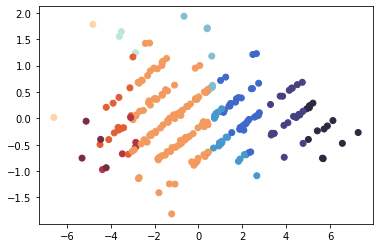

In [ ]:
DBSCAN_model = DBSCAN_handmade(eps=2, min_samples=10)
DBSCAN_model.fit(pca_fit)
plt.scatter(pca_fit[:,0], pca_fit[:,1], c = DBSCAN_model.fit(st) , cmap='icefire_r')